In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session, Options
service = QiskitRuntimeService(channel="ibm_cloud")
service.backends()
service.backends(simulator=False, operational=True, min_num_qubits=5)


[<IBMBackend('ibm_algiers')>, <IBMBackend('ibm_brisbane')>]

In [6]:
backend = service.backend('ibmq_qasm_simulator')
backend.name #returns the backend's name

'ibmq_qasm_simulator'

In [7]:
service = QiskitRuntimeService(channel="ibm_cloud")
options = Options()
options.resilience_level=1 
options.execution.shots=1024
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure_all()

  >SamplerResult(quasi_dists=[{1: 0.4931640625, 2: 0.5068359375}], metadata=[{'shots': 1024, 'readout_mitigation_overhead': 1.0, 'readout_mitigation_time': 0.013909881003201008}])


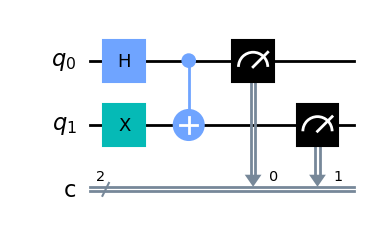

In [10]:
from qiskit.visualization import plot_histogram
with Session(backend=backend):
    sampler = Sampler(options=options)
    job = sampler.run(circuit)
    result = job.result()
    print(f"  >{result}")
    display(circuit.draw("mpl"))

In [9]:
from qiskit import QuantumRegister, ClassicalRegister

q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')
circuit = QuantumCircuit(q,c)
circuit.x(q[1]) # Pauli-X gate 
circuit.h(q[0]) # Hadamard gate 
circuit.cx(q[0],q[1]) # CNOT gate\
circuit.measure(q,c) # Qubit Measurment